In [376]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.preprocessing import StandardScaler

import os

import warnings # 경고메세지 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

In [377]:
# 폴더 생성 함수

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [378]:
data = pd.read_csv('titanic.csv')
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [379]:
# NaN 개수 파악 df

def checkNAN(df):

    train_nan = list(df.isna().sum())
    num_nan = list(filter(lambda x:x >= 1, train_nan)) # nan값이 1개 이상인 친구만 보여줌

    index_nan = list(filter(lambda e:train_nan[e] >= 1, range(len(train_nan)))) # 이건 인덱스

    nan_df = pd.DataFrame({'index_in_train' : index_nan, 'column_name' : df.iloc[:, index_nan].columns, 'NAN_number' : num_nan})
    
    return nan_df

In [372]:
def handle_NAN(df, list_lists, drop_row, drop_col, fill_na, fill_value, back_fill, front_fill):

    fill_val_dict = {}

    for i in range(len(fill_value[1])):
        fill_val_dict[col_list[fill_value[0]][i]] = fill_value[1][i]
        
    sequence = {drop_row : "df[" + str(list_lists[drop_row]) + "].dropna(axis = 0)", 
                drop_col : "df[" + str(list_lists[drop_col]) + "].dropna(axis = 1)", 
                fill_na[0] : "df[" + str(list_lists[fill_na[0]]) + "].fillna(" + str(fill_na[1]) + ")", 
                fill_value[0] : "df[" + str(list_lists[fill_value[0]]) + "].fillna(" + str(fill_val_dict) + ")", 
                back_fill : "df[" + str(list_lists[back_fill]) + "].fillna( method='bfill' )",
                front_fill : "df[" + str(list_lists[front_fill]) + "].fillna( method='ffill' )",
                }

    del sequence[-1]
    
    sequence_sort = dict(sorted(sequence.items()))
    
    for i in range (len(sequence_sort)):
        df[list_lists[i]] = eval(sequence_sort[i])
    return df

In [382]:
# 결측치 자동 처리기 미리보기

nan_df = checkNAN(data)
display(nan_df)
print('=='*20)


##########################################################################################
# 아래의 숫자는 파라미터입니다. 0부터 코드가 시작되며 결측치가 처리됩니다.
# fill_na의 [0]은 순서, [1]은 채워지는 값입니다.
# fill_value의 [0]은 순서, [1]은 정해주는 컬럼마다 채워지는 값입니다. ex) ['Age'. 'Fare'], [1, 2]이면 // Age는 1, Fare은 2로 채워짐
# col_list에는 리스트 형태로 컬럼명을 넣어주면 됩니다. 주의 : 이중 리스트가 아님!

drop_row = -1
drop_col = -1
fill_na = [0, 3]
fill_value = [1, [1]]
back_fill = 2
front_fill = -1

col_list = [['Age'], ['Cabin'],['Embarked']]

##########################################################################################

sequence_view = ["data", col_list, drop_row, drop_col, fill_na, fill_value, back_fill, front_fill]
sequence_num = sequence_view[2 : len(sequence_view)]

sequence_dic = pd.DataFrame({'func' : [drop_row, drop_col, fill_na[0], fill_value[0], back_fill, front_fill], 
                            'func_list' : ['drop_row', 'drop_col', 'fill_na', 'fill_value', 'backfill', 'front_fill'], 
                            'parameter' : ['none', 'none', fill_na[1], fill_value[1], 'none', 'none']})
sequence_dic = sequence_dic.sort_values('func')


display(sequence_dic)

sequence_dic = sequence_dic[sequence_dic['func'] >= 0]
sequence_dic['columns'] = col_list
print('=='*20)
display(sequence_dic)

,index_in_train,column_name,NAN_number
0,5,Age,177
1,10,Cabin,687
2,11,Embarked,2


,func,func_list,parameter
0,-1,drop_row,none
1,-1,drop_col,none
5,-1,front_fill,none
2,0,fill_na,3
3,1,fill_value,[1]
4,2,backfill,none


,func,func_list,parameter,columns
2,0,fill_na,3,[Age]
3,1,fill_value,[1],[Cabin]
4,2,backfill,none,[Embarked]


In [384]:
col_list = [['Age'], ['Cabin'], ['Embarked']]
drop_row = -1
drop_col = -1
fill_na = [0, 3]
fill_value = [1, [1]]
back_fill = 2
front_fill = -1

a = handle_NAN(data, col_list, drop_row, drop_col, fill_na, fill_value, back_fill, front_fill)
display(a)
display(checkNAN(data))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.0,1,2,W./C. 6607,23.4500,1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,index_in_train,column_name,NAN_number


In [55]:
# 변수들
def check_features(data):

    cat = list(set(list(data.select_dtypes("object").columns) + list(data.select_dtypes("bool").columns) + list(data.select_dtypes("category").columns)))
    num = list(set(list(data.select_dtypes("int").columns) + list(data.select_dtypes("float").columns)))
    # include_word_feats1 = [s for s in data if "변수에 포함된 단어" in s]
    # include_word_feats2 = [s for s in data if "변수에 포함된 단어" in s]
    print(cat)
    print(num)
    
    return cat, num

In [6]:
# 컬럼 타입 변경

# data.astype({'컬럼명':'float', '컬럼명':'float'}).dtypes

In [45]:
# 상관계수 히트맵
def make_corr_heatmap(df):
    
    plt.figure(figsize = (8, 8))
    mask = np.zeros_like(df.corr(), dtype=bool) # corr을 다른 것으로 바꾸면 다른 상관계수 그래프를 그릴 수도 있음
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
    plt.show()

In [36]:
def make_distplots(feature_list):

    dist_feature_list = feature_list

    createFolder('distplot')

    rcm = 1

    while True:
        if len(dist_feature_list) <= rcm ** 2:
            break
        else:
            rcm += 1

    count_index = 1

    for i in dist_feature_list:
        plt.subplot(rcm, rcm, count_index)
        
        sns.distplot(data[i], hist = True, bins = 16)

        plt.title(i)
        plt.tight_layout()
        plt.savefig('distplot\\dist')
            
        count_index += 1
    plt.show()

In [31]:
# 모든 scatter plot과 histogram plot을 그려주는 명령어, 렉걸릴 수 있으니 조심해서 사용

# sns.pairplot(data, hue = 'Survived')
# plt.show()

In [38]:
def make_boxplots(feature_list):

    dist_feature_list = feature_list

    createFolder('boxplot')

    rcm = 1

    while True:
        if len(dist_feature_list) <= rcm ** 2:
            break
        else:
            rcm += 1

    count_index = 1

    for i in dist_feature_list:
        plt.subplot(rcm, rcm, count_index)
        
        sns.boxplot(data = data, x = data[i])

        plt.title(i)
        plt.tight_layout()
        plt.savefig('boxplot\\box')
            
        count_index += 1
    plt.show()

['Sex', 'Ticket', 'Cabin', 'Embarked', 'Name']
['Fare', 'Parch', 'Pclass', 'PassengerId', 'Survived', 'SibSp', 'Age']


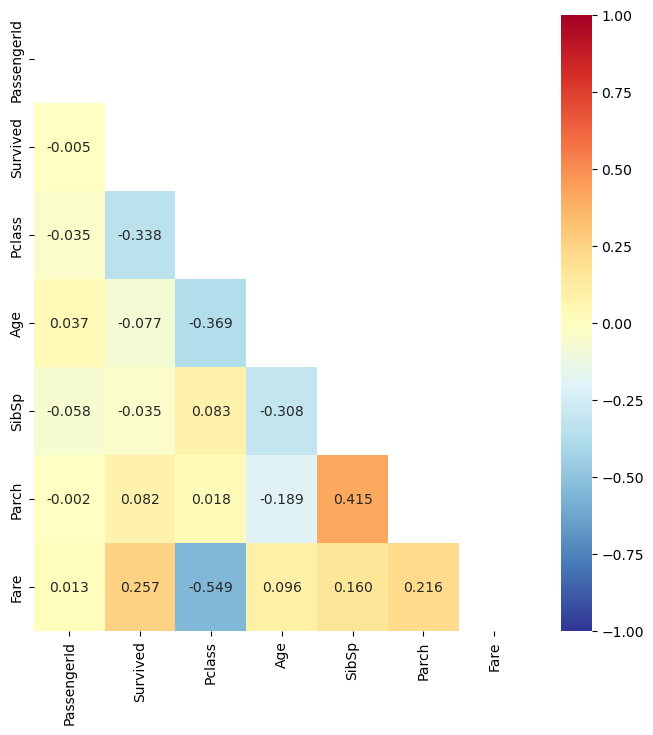

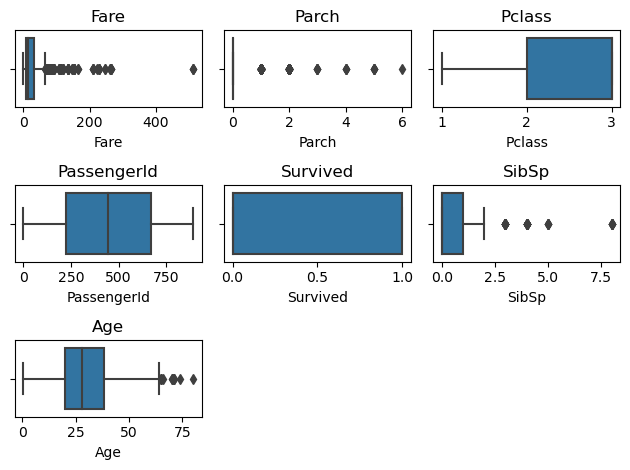

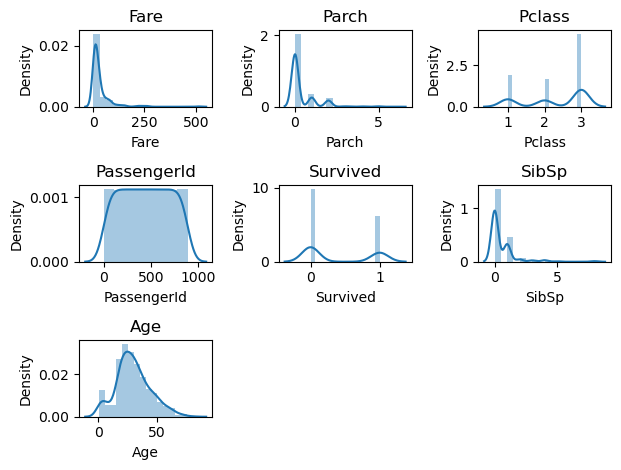

In [133]:
categorial_feats, numerical_feats = check_features(data)
checkNAN(data)
make_corr_heatmap(data)
make_boxplots(numerical_feats)
make_distplots(numerical_feats)